In [ ]:
import numpy as np
import cv2
A=np.array([[1,2,1,5],[2,5,3,1],[1,4,1,0],[1,3,0,2]],'uint8')
mascara=np.array([[0,2,3],[1,1,0],[1,2,2]],'uint8')
dst = cv2.filter2D(A, -1, mascara)
print("Matriz\n",A);print("\nKernel o Máscara\n",mascara);print("\nResultado Filtrado 2D\n",dst)
#Realiza una correlación

In [ ]:
#Filtro de media
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
img = cv2.imread('lenna.jpg')#carga la imagen
cv2.imshow("Imagen",img)
cv2.waitKey()

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Convierte en escala de grises
kernel = np.ones((7,7),np.float32)/25 #genera la máscara
#print(kernel)
suavizada = cv2.filter2D(gris,-1,kernel) #-1 indica que genera una imagen del mismo tipo

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(12)

axs[0].imshow(gris,cmap='gray',vmin=0,vmax=255)
axs[0].set_title('Original')

axs[1].imshow(suavizada,cmap='gray',vmin=0,vmax=255)
axs[1].set_title('Suavizada')

plt.show()
cv2.destroyAllWindows() #destruye las ventanas creadas

In [ ]:
#Filtro gaussiano
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
img = cv2.imread('lenna.jpg')#carga la imagen como numpy de uint8
gris = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)#Convierte en escala de grises

blur = cv2.GaussianBlur(gris,(5,5),0)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)


plt.subplot(121),plt.imshow(gris,cmap='gray',vmin=0,vmax=255),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Gaussiano')
plt.xticks([]), plt.yticks([])
print(type(blur[0] [0]))
plt.show()



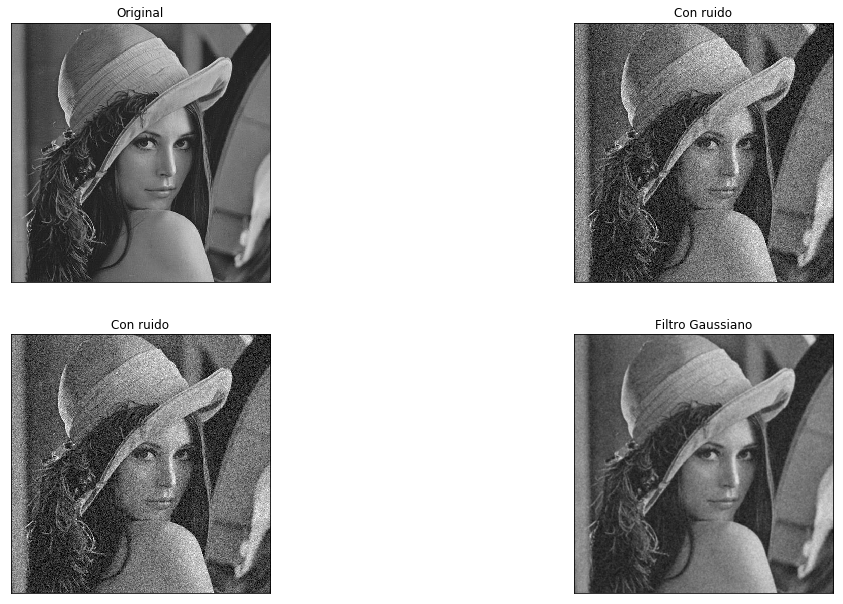

In [2]:
#Probaremos el filtro gaussiano añadiendo ruido gaussiano
#Generamos una imagen con ruido
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lenna.jpg')    # numpy-array of shape (N, M); dtype=np.uint8
#print(type(img))
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Convierte en escala de grises.
mean = 5.0   # valor medio
std = 20.0    # desviación estándar
ruido = np.random.normal(mean, std, gris.shape)
imagen_con_ruido=gris+ruido
imagen_ruidosa_recortada = np.clip(imagen_con_ruido,0,255) #para que no salga de los límites
#print(type(imagen_ruidosa_recortada[0] [0]))

imagenfinal=np.uint8(imagen_ruidosa_recortada)

#Aplico filtro gaussiano
blur = cv2.GaussianBlur(imagenfinal,(5,5),0)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(221),plt.imshow(gris,cmap='gray',vmin=0,vmax=255),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(imagenfinal,cmap='gray',vmin=0,vmax=255),plt.title('Con ruido')
plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3),plt.imshow(imagenfinal,cmap='gray',vmin=0,vmax=255),plt.title('Con ruido')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(blur,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Gaussiano')
plt.xticks([]), plt.yticks([])
plt.show()






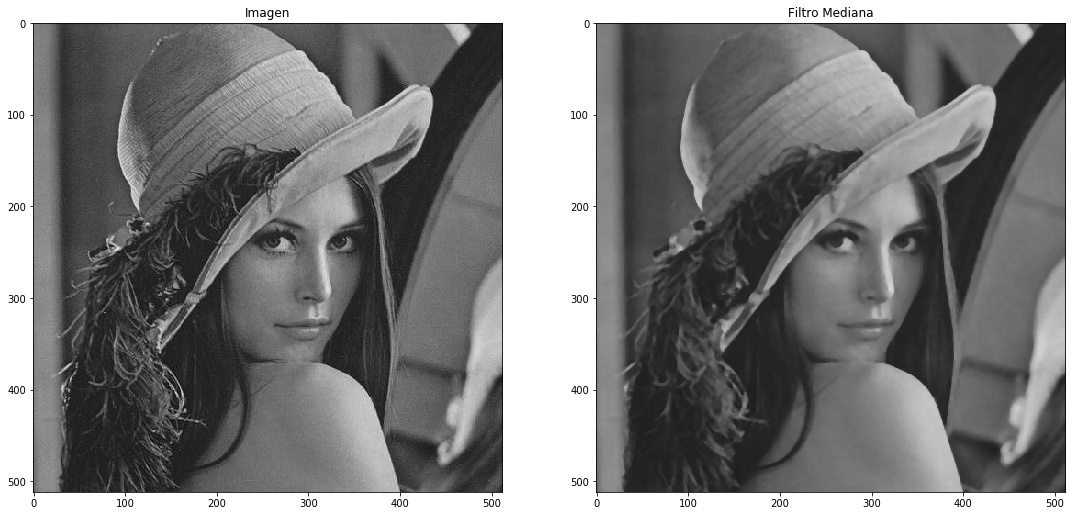

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('lenna.jpg')    # numpy-array of shape (N, M); dtype=np.uint8

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Convierte en escala de grises

#Filtro de la mediana
median = cv2.medianBlur(gris,5)#filtro de la mediana
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(121),plt.imshow(gris,cmap='gray',vmin=0,vmax=255),plt.title('Imagen')

plt.subplot(122),plt.imshow(median,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Mediana')

plt.show()
#Para ver el efecto agregarle ruido salt & pepper

<class 'numpy.ndarray'>


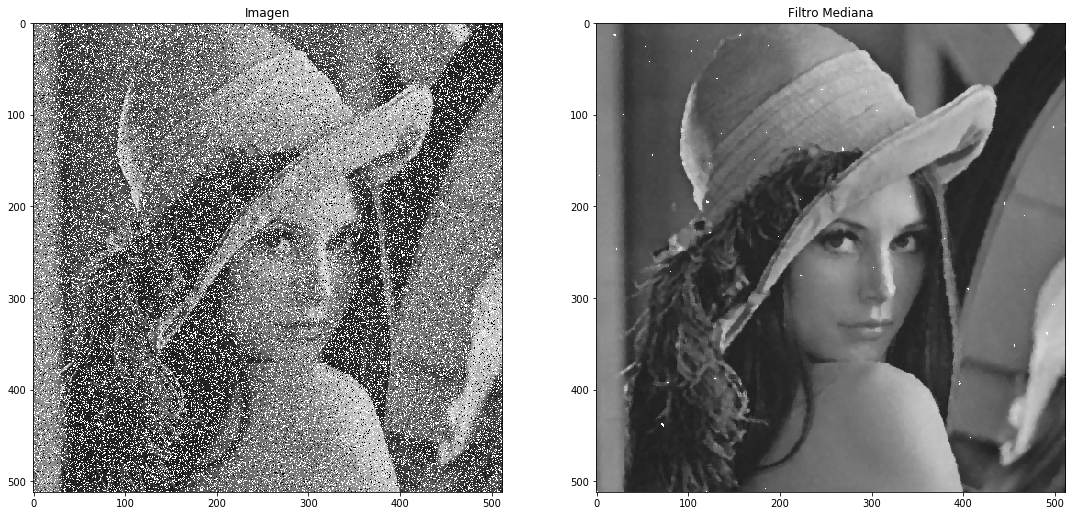

In [7]:
#Generar una imagen con ruido sal y pimienta
#Aplicar filtro de mediana
import numpy as np 
import random 
import cv2 

def sp_noise(image,prob,thres): 
#agregar ruido salt and pepper noise a una imagen 
#prob=probabilidad del ruido 

    output = np.zeros(image.shape,np.uint8) 
    
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]): 
            rdn = random.random() #devuelve flotante entre 0.0 y 1.
            if rdn < prob: 
                output[i][j] = 0 
            elif rdn > thres: 
                output[i][j] = 255 
            else: 
                output[i][j] = image[i][j] 
    return output 

image = cv2.imread('lenna.jpg')
image= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
noise_img = sp_noise(image,0.05,0.8) 
print(type(noise_img))
cv2.imwrite('lennasp_noise.jpg', noise_img) 
cv2.imshow("Imagen con SP",noise_img)
cv2.waitKey(0)
median = cv2.medianBlur(noise_img,5)#filtro de la mediana
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(121),plt.imshow(noise_img,cmap='gray',vmin=0,vmax=255),plt.title('Imagen')

plt.subplot(122),plt.imshow(median,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Mediana')

plt.show()